In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# install

In [ ]:
# pip install git+https://github.com/weecology/DeepForest.git
# pip install deepforest

https://deepforest.readthedocs.io/en/latest/getting_started.html


# load libraries

In [ ]:
from deepforest import main
import matplotlib.pyplot as plt

# load model

In [ ]:
m = main.deepforest()
m.use_release()

# predict boxes

In [ ]:
from deepforest import get_data

sample_image = get_data("OSBS_029.png")
sample_image

In [ ]:
img = m.predict_image(path=sample_image,return_plot=True)

#predict_image returns plot in BlueGreenRed (opencv style), but matplotlib likes RedGreenBlue, switch the channel order.
plt.imshow(img[:,:,::-1])

## split big image in small #45

Images 4


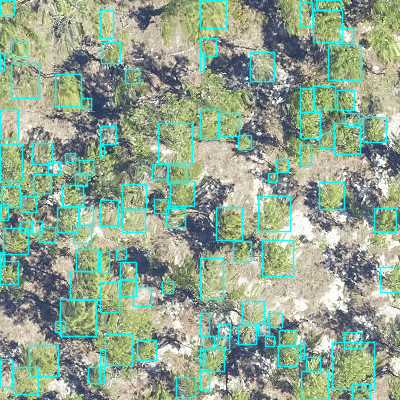

In [111]:
from deepforest import get_data
from PIL import Image
import cv2

sample_image = get_data("OSBS_029.png")
sample_image

img = cv2.imread(sample_image)
desiredWidth = 100
desiredHeight = 400
imgs = []
for r in range(0,img.shape[0],desiredHeight):
    for c in range(0,img.shape[1],desiredWidth):
        crop_img = img[r:r+desiredHeight, c:c+desiredWidth,:]
        imgs.append(crop_img)
        
print("Images", len(imgs))
new_im = Image.new('RGB', (img.shape[1], img.shape[0]))
x_offset = 0
y_offset = 0
for im in imgs:
    imgToProcess = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    imgDF = m.predict_image(image=imgToProcess.astype('float32'),return_plot=True)
    new_im.paste(Image.fromarray(cv2.cvtColor(imgDF, cv2.COLOR_BGR2RGB)), (x_offset,y_offset))
    x_offset += im.shape[1]
    if x_offset == img.shape[1]:
        x_offset = 0
        y_offset = (y_offset + im.shape[0]) % img.shape[0]

display(new_im)

# Predict to xml, for LabelImg

Copy the image to the unlabeled (images) target folder, where label img will be started

In [ ]:
! cp /usr/local/lib/python3.8/site-packages/deepforest/data/OSBS_029.png /work/unlabeled_imgs/

Predict bboxes

In [ ]:
bboxes = m.predict_image(path=sample_image)
bboxes.head(3)

In [ ]:
import sys
import os
project_root = '../'
sys.path.append(os.path.abspath(project_root))

from src.visualization.viz_utils import annotations_to_xml

In [ ]:
xml = annotations_to_xml(bboxes, '/work/unlabeled_imgs/OSBS_029.png', write_file=True) # writes by default
